<a href="https://colab.research.google.com/github/kabeerbora/1st_global/blob/main/1st_global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
# sheet_id = '1ziZc1OlSzIDhxmq1RtDbf_HQUHw_LPFoWQdoxuREc-4'
# sheet_name = 'Sheet4'
# url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
# df = pd.read_csv(url)
# df.to_parquet('/content/drive/MyDrive/1st_globalization/1stglobal.parquet')
!wget https://raw.githubusercontent.com/kabeerbora/1st_global/main/1stglobal.parquet
df = pd.read_parquet('1stglobal.parquet')

Mounted at /content/drive
--2025-09-13 01:59:20--  https://raw.githubusercontent.com/kabeerbora/1st_global/main/1stglobal.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57601 (56K) [application/octet-stream]
Saving to: ‘1stglobal.parquet’

1stglobal.parquet   100%[===================>]  56.25K  --.-KB/s    in 0.01s   

2025-09-13 01:59:20 (4.52 MB/s) - ‘1stglobal.parquet’ saved [57601/57601]



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='rop', hue='Country', data=df, marker='o')
plt.title('Rate of Profit - 1870 to 1913')
plt.xlabel('Year')
plt.ylabel('Rate of Profit')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [11]:
sheet_id = '1T_76VszKnPgAEm02BJl8mTmNc0hlOzMs'
sheet_name = 'Sheet1'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df_open = pd.read_csv(url)
df_open.columns

Index(['year', 'country', 'iso', 'ifs', 'pop', 'rgdpmad', 'rgdpbarro',
       'rconsbarro', 'gdp', 'iy', 'cpi', 'ca', 'imports', 'exports',
       'openness', 'narrowm', 'money', 'stir', 'ltrate', 'hpnom', 'unemp',
       'wage', 'debtgdp', 'revenue', 'expenditure', 'xrusd', 'tloans', 'tmort',
       'thh', 'tbus', 'bdebt', 'lev', 'ltd', 'noncore', 'crisisJST',
       'crisisJST_old', 'peg', 'peg_strict', 'peg_type', 'peg_base',
       'JSTtrilemmaIV', 'eq_tr', 'housing_tr', 'bond_tr', 'bill_rate',
       'rent_ipolated', 'housing_capgain_ipolated', 'housing_capgain',
       'housing_rent_rtn', 'housing_rent_yd', 'eq_capgain', 'eq_dp',
       'eq_capgain_interp', 'eq_tr_interp', 'eq_dp_interp', 'bond_rate',
       'eq_div_rtn', 'capital_tr', 'risky_tr', 'safe_tr'],
      dtype='object')

In [12]:
df_open = df_open[df_open['year'] <= 1913]

In [13]:
df_open['exp_gdp'] = df_open['exports']/df_open['gdp']
df_open['imp_gdp'] = df_open['imports']/df_open['gdp']

In [14]:
df_open = df_open[['exp_gdp', 'imp_gdp', 'year', 'country','iso', 'openness']]

In [6]:
iso_list = ['DEU','ESP', 'FRA', 'GBR', 'NLD', 'SWE', 'USA']
df_open = df_open[df_open['iso'].isin(iso_list)]
df_open

,exp_gdp,imp_gdp,year,country,iso
604,NaN,NaN,1870,Germany,DEU
605,NaN,NaN,1871,Germany,DEU
606,NaN,NaN,1872,Germany,DEU
607,NaN,NaN,1873,Germany,DEU
608,NaN,NaN,1874,Germany,DEU
...,...,...,...,...,...
2606,0.052827,0.040750,1909,USA,USA
2607,0.053340,0.047176,1910,USA,USA
2608,0.060966,0.045364,1911,USA,USA
2609,0.060114,0.045039,1912,USA,USA


In [15]:
iso_list = ['DEU', 'ESP', 'FRA','GBR','NLD','SWE', 'USA']
df_open = df_open[df_open['iso'].isin(iso_list)]
df_open

,exp_gdp,imp_gdp,year,country,iso,openness
604,NaN,NaN,1870,Germany,DEU,0.000000
605,NaN,NaN,1871,Germany,DEU,0.000000
606,NaN,NaN,1872,Germany,DEU,0.388978
607,NaN,NaN,1873,Germany,DEU,0.388579
608,NaN,NaN,1874,Germany,DEU,0.372144
...,...,...,...,...,...,...
2606,0.052827,0.040750,1909,USA,USA,0.093577
2607,0.053340,0.047176,1910,USA,USA,0.100516
2608,0.060966,0.045364,1911,USA,USA,0.106330
2609,0.060114,0.045039,1912,USA,USA,0.105153


In [16]:
mask = (df_open['year'] >= 1870) & (df_open['year'] <= 1913)
df_open = df_open[mask]

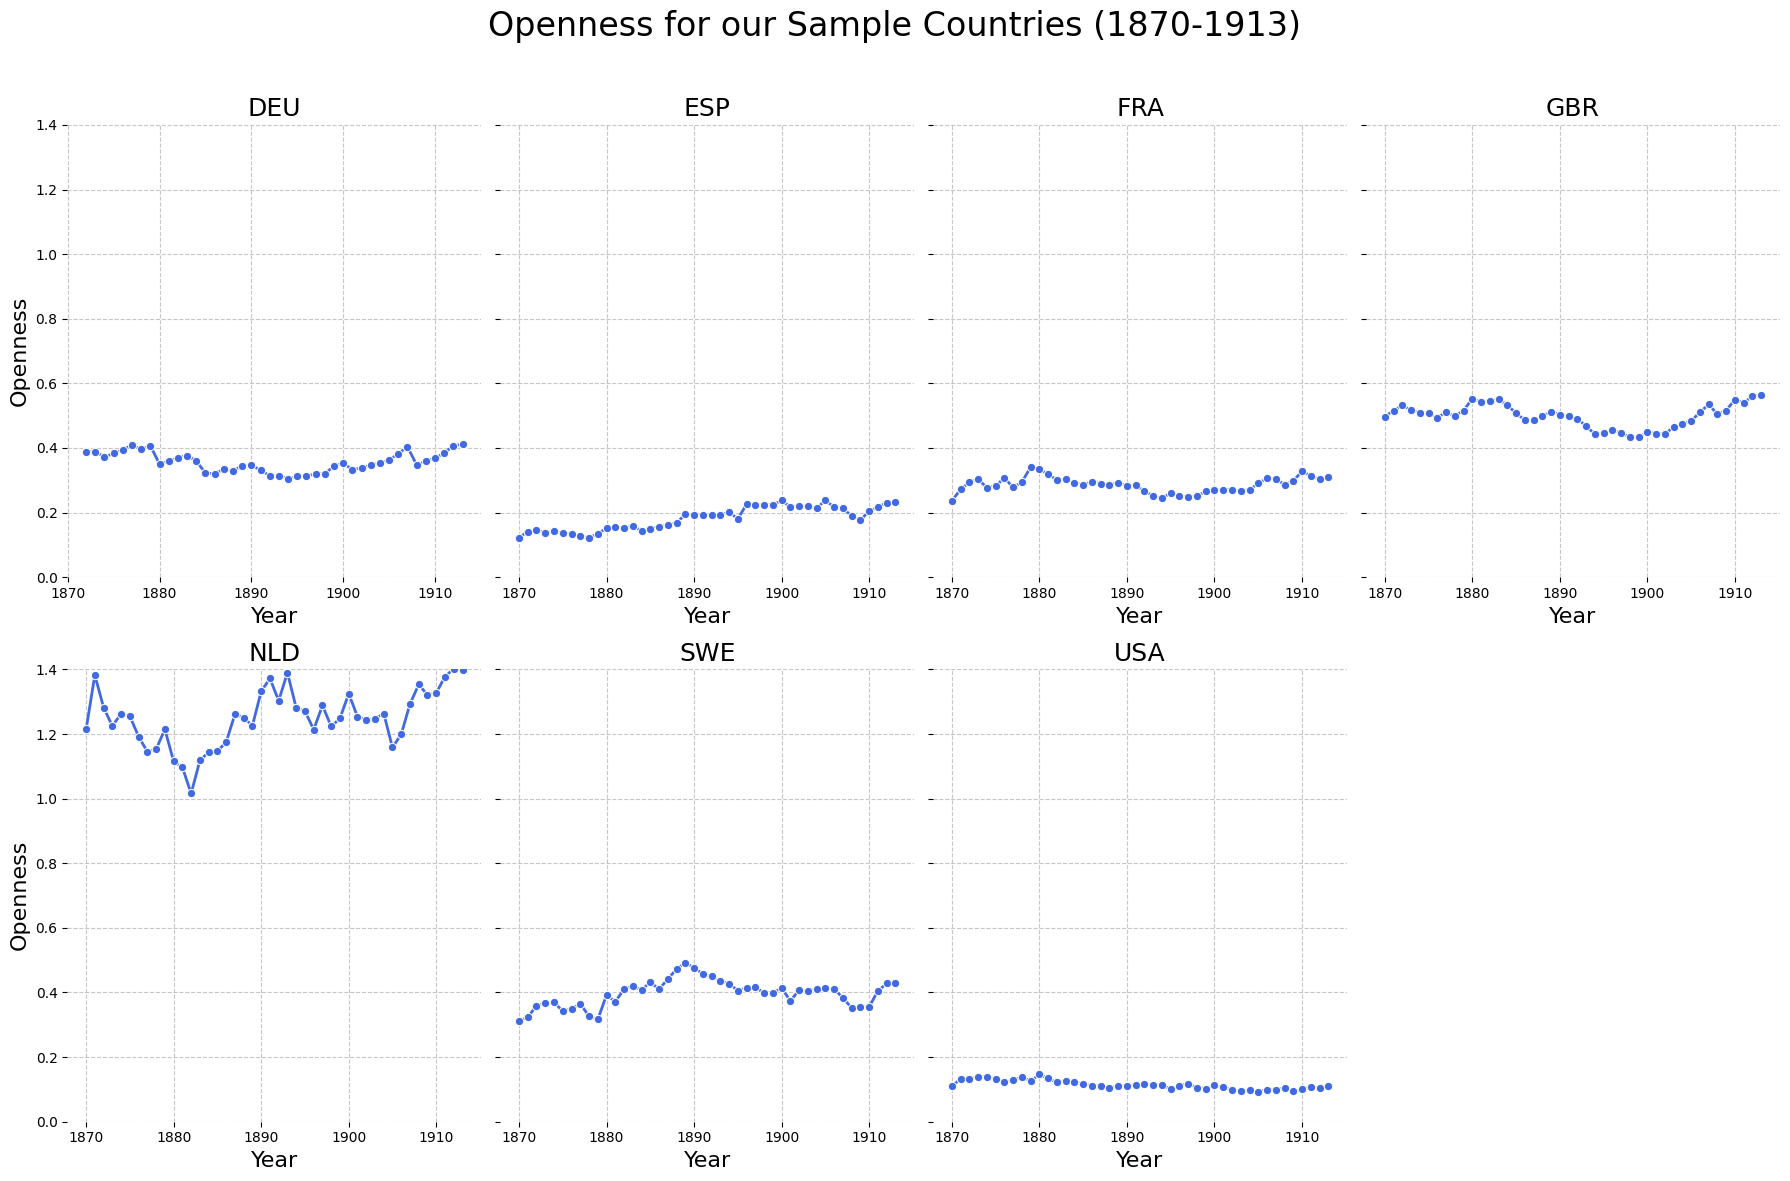

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
min_openness = df_open['openness'].min()
max_openness = df_open['openness'].max()
num_countries = len(df_open['iso'].unique())
num_cols = min(num_countries, 4)
num_rows = (num_countries + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows), sharey=True)
axes = axes.flatten()
for i, (country, group) in enumerate(df_open.groupby('iso')):
  ax = axes[i]


  group = group[group['openness'] != 0]

  sns.lineplot(x='year', y='openness', data=group, marker='o', ax=ax, color='royalblue', linewidth=2)

  ax.set_title(country, fontsize=18)
  ax.set_xlabel('Year', fontsize=16)
  ax.set_ylabel('Openness', fontsize=16)
  ax.grid(True, linestyle='--', alpha=0.7)
  ax.set_ylim(min_openness, max_openness)


  sns.despine(ax=ax, left=True, bottom=True)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Openness for our Sample Countries (1870-1913)', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

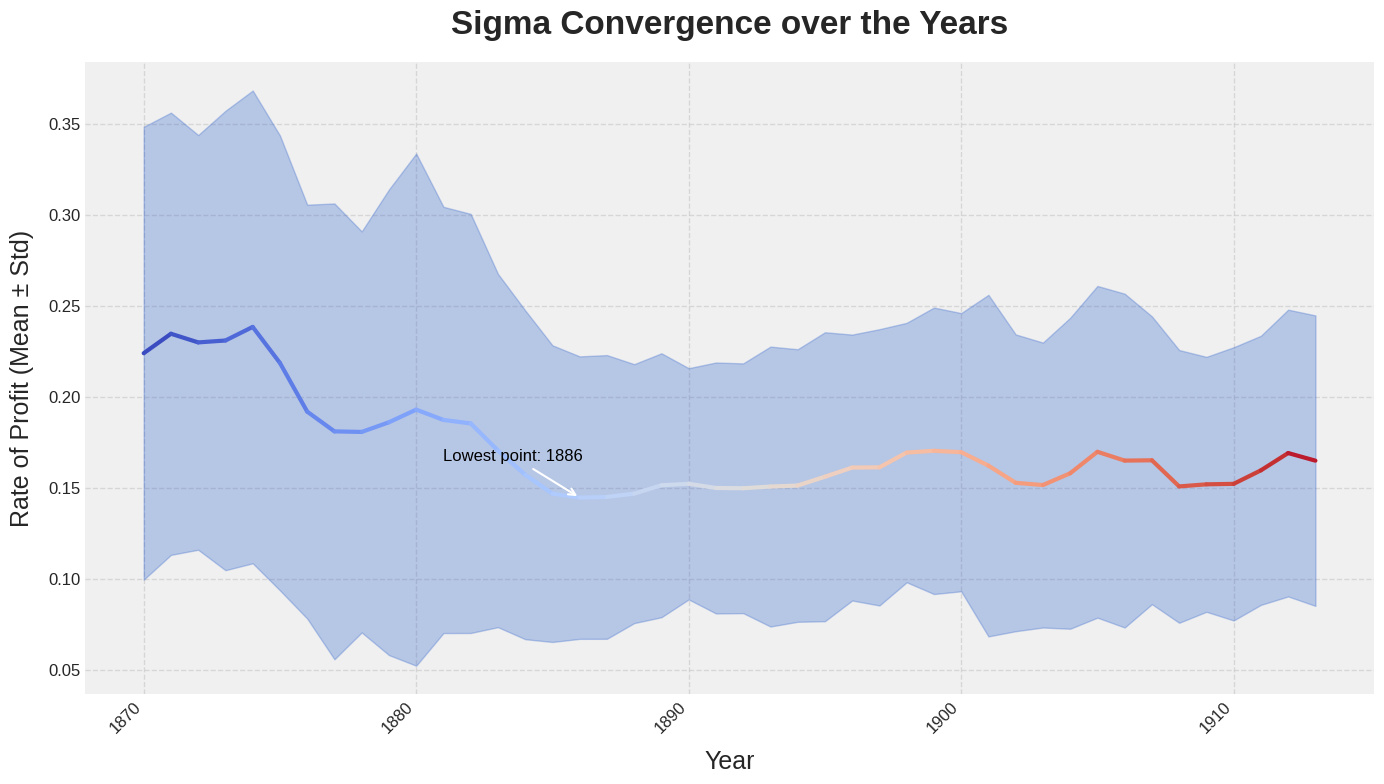

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sigma_rop_by_year = df.groupby('Year')['rop'].agg(['mean', 'std']).reset_index()


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("coolwarm")
fig, ax = plt.subplots(figsize=(14, 8))


ax.set_facecolor('#f0f0f0')
colors = plt.cm.coolwarm(np.linspace(0, 1, len(sigma_rop_by_year)))


for i in range(len(sigma_rop_by_year["Year"]) - 1):
    ax.plot(sigma_rop_by_year["Year"][i:i+2],
            sigma_rop_by_year["mean"][i:i+2],
            color=colors[i], linewidth=3)


ax.fill_between(sigma_rop_by_year['Year'],
                sigma_rop_by_year['mean'] - sigma_rop_by_year['std'],
                sigma_rop_by_year['mean'] + sigma_rop_by_year['std'],
                alpha=0.3, color='#3366cc')


ax.grid(True, linestyle='--', alpha=0.7, color='#cccccc')
ax.set_title('Sigma Convergence over the Years', fontsize=24, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=18, labelpad=10)
ax.set_ylabel('Rate of Profit (Mean ± Std)', fontsize=18, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=45, ha='right')

min_idx = sigma_rop_by_year["mean"].idxmin()
min_year = sigma_rop_by_year.loc[min_idx, "Year"]
min_value = sigma_rop_by_year.loc[min_idx, "mean"]

ax.annotate(f'Lowest point: {min_year}',
            xy=(min_year, min_value),
            xytext=(min_year - 5, min_value + 0.02),
            arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),
            fontsize=12, color='black')


sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig('sigma_convergence_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df_world = pd.read_csv('/content/drive/MyDrive/1st_globalization/world_exports.csv')
df_world

,Entity,Code,Year,World trade based on Maddison (% of GDP) (Klasing and Milionis (2014)),"World trade - upper bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",World trade based on own estimates (% of GDP) (Klasing and Milionis (2014)),"World trade - lower bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",Trade (% of GDP),Trade openness (share of exports and imports in GDP)
0,World,OWID_WRL,1500,NaN,2.25,NaN,0.50000,NaN,NaN
1,World,OWID_WRL,1600,NaN,5.50,NaN,1.25000,NaN,NaN
2,World,OWID_WRL,1700,NaN,5.50,NaN,1.25000,NaN,NaN
3,World,OWID_WRL,1820,NaN,9.50,NaN,2.00000,NaN,NaN
4,World,OWID_WRL,1870,11.76,NaN,NaN,17.57000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13310,Vanuatu,VUT,2022,NaN,NaN,NaN,68.51271,NaN,NaN
13311,Vietnam,VNM,2022,NaN,NaN,NaN,185.72998,NaN,NaN
13312,World,OWID_WRL,2022,NaN,NaN,NaN,62.56355,NaN,NaN
13313,Zambia,ZMB,2022,NaN,NaN,NaN,NaN,69.29732,NaN


In [ ]:
df_world= df_world[df_world['Entity'] == 'World']

In [ ]:
df_world = df_world.sort_values(by='Year', ascending=True)
df_world

,Entity,Code,Year,World trade based on Maddison (% of GDP) (Klasing and Milionis (2014)),"World trade - upper bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",World trade based on own estimates (% of GDP) (Klasing and Milionis (2014)),"World trade - lower bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",Trade (% of GDP),Trade openness (share of exports and imports in GDP)
0,World,OWID_WRL,1500,NaN,2.25,NaN,0.500000,NaN,NaN
1,World,OWID_WRL,1600,NaN,5.50,NaN,1.250000,NaN,NaN
2,World,OWID_WRL,1700,NaN,5.50,NaN,1.250000,NaN,NaN
3,World,OWID_WRL,1820,NaN,9.50,NaN,2.000000,NaN,NaN
4,World,OWID_WRL,1870,11.76,NaN,NaN,17.570000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12537,World,OWID_WRL,2018,NaN,NaN,NaN,57.822994,57.708447,NaN
12768,World,OWID_WRL,2019,NaN,NaN,NaN,55.852898,56.497578,NaN
12958,World,OWID_WRL,2020,NaN,NaN,NaN,52.433937,NaN,NaN
13142,World,OWID_WRL,2021,NaN,NaN,NaN,56.811600,NaN,NaN


In [ ]:
df_world['export_share'] = df_world['World trade - lower bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))']
df_world

,Entity,Code,Year,World trade based on Maddison (% of GDP) (Klasing and Milionis (2014)),"World trade - upper bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",World trade based on own estimates (% of GDP) (Klasing and Milionis (2014)),"World trade - lower bound (% of GDP) (Estevadeordal, Frantz, and Taylor (2003))",Trade (% of GDP),Trade openness (share of exports and imports in GDP),export_share
0,World,OWID_WRL,1500,NaN,2.25,NaN,0.500000,NaN,NaN,0.500000
1,World,OWID_WRL,1600,NaN,5.50,NaN,1.250000,NaN,NaN,1.250000
2,World,OWID_WRL,1700,NaN,5.50,NaN,1.250000,NaN,NaN,1.250000
3,World,OWID_WRL,1820,NaN,9.50,NaN,2.000000,NaN,NaN,2.000000
4,World,OWID_WRL,1870,11.76,NaN,NaN,17.570000,NaN,NaN,17.570000
...,...,...,...,...,...,...,...,...,...,...
12537,World,OWID_WRL,2018,NaN,NaN,NaN,57.822994,57.708447,NaN,57.822994
12768,World,OWID_WRL,2019,NaN,NaN,NaN,55.852898,56.497578,NaN,55.852898
12958,World,OWID_WRL,2020,NaN,NaN,NaN,52.433937,NaN,NaN,52.433937
13142,World,OWID_WRL,2021,NaN,NaN,NaN,56.811600,NaN,NaN,56.811600


<ipython-input-56-d97ba89212f2>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Year', y='export_share', data=df_world, palette='viridis', linewidth=2)


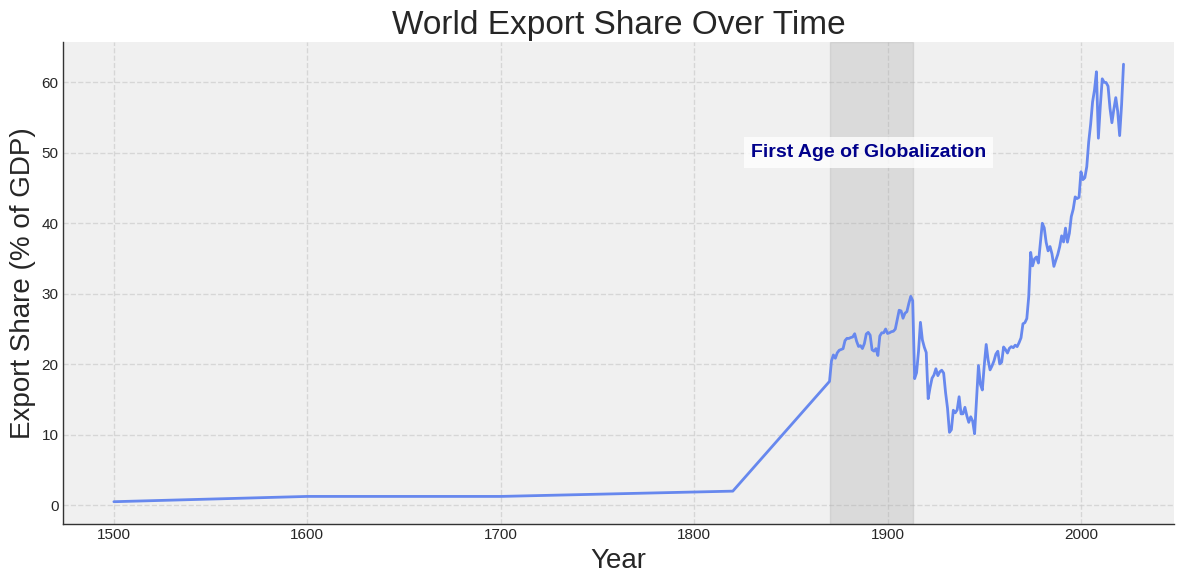

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='export_share', data=df_world, palette='viridis', linewidth=2)
plt.axvspan(1870, 1913, color='darkgray', alpha=0.3)
plt.title('World Export Share Over Time', fontsize=24)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Export Share (% of GDP)', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')
plt.text(1890, 50, 'First Age of Globalization', fontsize=14, ha='center', va='center',
         color='darkblue', fontweight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=5))
plt.tight_layout()
plt.show()

In [ ]:
!wget https://raw.githubusercontent.com/kabeerbora/1st_global/main/ineqImperialism.dta
df_dta = pd.read_stata('ineqImperialism.dta')

,country,ccode,iso,year,PWnet_shrY,NWnfa_c,NWnfa_shrY,NWgfa_c,NWgfa_shrY,NWgfl_c,...,imp_war,for_bond,for_eq,for_tot,col_bond,col_eq,col_tot,colfor_bond,colfor_eq,colfor_tot
0,Australia,Australia,AUS,1870,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,Australia,AUS,1871,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,Australia,AUS,1872,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,Australia,AUS,1873,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,Australia,AUS,1874,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,South Africa,S Africa,ZAF,1909,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,South Africa,S Africa,ZAF,1910,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,South Africa,S Africa,ZAF,1911,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,South Africa,S Africa,ZAF,1912,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
countries_to_remove = []
for country, group in df_dta.groupby('country'):
    if group['NWnfa_shrY'].isnull().all():
        countries_to_remove.append(country)
df_dta_cleaned = df_dta[~df_dta['country'].isin(countries_to_remove)]
df_dta_cleaned
df['Country'].unique()

array(['Germany', 'Spain', 'France', 'UK', 'Netherlands', 'Sweden', 'USA'],
      dtype=object)

In [ ]:
df_dta_cleaned['country'].unique()

pd.merge(df, df_dta_cleaned, left_on='Country', right_on='country', how='left')

,Country,Year,openness,rop,iy,wage,k/l,kl_index,labor,gdp_x,...,imp_war,for_bond,for_eq,for_tot,col_bond,col_eq,col_tot,colfor_bond,colfor_eq,colfor_tot
0,Germany,1870,NaN,0.03742,NaN,0.072300,0.000004,1.000000,"17,046",115000000.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Germany,1870,NaN,0.03742,NaN,0.072300,0.000004,1.000000,"17,046",115000000.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,1870,NaN,0.03742,NaN,0.072300,0.000004,1.000000,"17,046",115000000.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Germany,1870,NaN,0.03742,NaN,0.072300,0.000004,1.000000,"17,046",115000000.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,1870,NaN,0.03742,NaN,0.072300,0.000004,1.000000,"17,046",115000000.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,USA,1909,0.093577,0.22900,0.160776,0.280658,43.510109,1.818383,30.962,890000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5980,USA,1910,0.100516,0.19700,0.160988,0.277292,43.788927,1.830035,31.79,894000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5981,USA,1911,0.106330,0.19700,0.142187,0.281764,44.315051,1.852023,32.29,917000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5982,USA,1912,0.105153,0.21800,0.149492,0.285422,44.021121,1.839739,33.237,955000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mapping = {
    'Germany': 'Germany',
    'Denmark': 'Denmark',
    'France': 'France',
    'United Kingdom': 'UK',
    'Sweden': 'Sweden',
    'United States': 'US'
}

df_dta_cleaned['country'] = df_dta_cleaned['country'].replace(mapping)


<ipython-input-89-9386b40ce33e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dta_cleaned['country'] = df_dta_cleaned['country'].replace(mapping)


In [ ]:
merged_df = pd.merge(df, df_dta_cleaned, left_on=['Year', 'Country'], right_on=['year', 'country'], how='left')

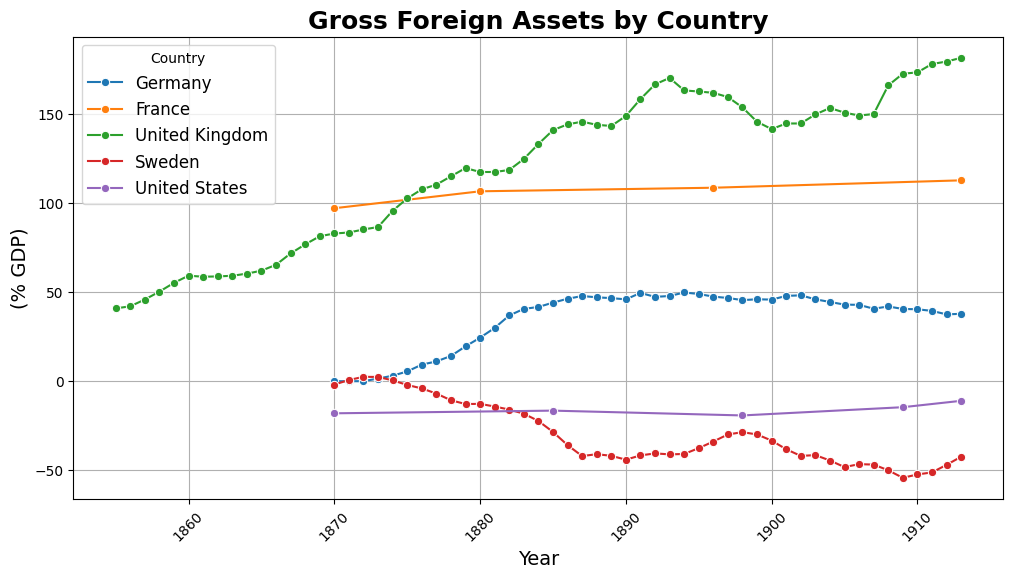

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='NWnfa_shrY', hue='country', data=df_dta_cleaned, marker='o')
plt.title('Gross Foreign Assets by Country',fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('(% GDP)',fontsize=14)
plt.grid(True)
plt.legend(title='Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_dta_cleaned = df_dta_cleaned[df_dta_cleaned['country'] != 'Denmark']

In [ ]:
df_dta_cleaned['country'] = df_dta_cleaned['country'].replace('United Kingdom', 'UK')
df_dta_cleaned['country'] = df_dta_cleaned['country'].replace('United States', 'USA')
country_list = df_dta_cleaned['country'].tolist()
df_dta_cleaned

<ipython-input-110-17c856e9d222>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dta_cleaned['country'] = df_dta_cleaned['country'].replace('United Kingdom', 'UK')
<ipython-input-110-17c856e9d222>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dta_cleaned['country'] = df_dta_cleaned['country'].replace('United States', 'USA')


,country,ccode,iso,year,PWnet_shrY,NWnfa_c,NWnfa_shrY,NWgfa_c,NWgfa_shrY,NWgfl_c,...,imp_war,for_bond,for_eq,for_tot,col_bond,col_eq,col_tot,colfor_bond,colfor_eq,colfor_tot
176,Germany,Germany,DEU,1870,703.720000,NaN,0.000000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,Germany,Germany,DEU,1871,689.700000,NaN,0.000000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,Germany,Germany,DEU,1872,629.580000,NaN,0.000000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,Germany,Germany,DEU,1873,633.140000,NaN,1.483312,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,Germany,Germany,DEU,1874,601.260000,NaN,3.065251,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,US,US,USA,1909,455.799673,NaN,-14.587763,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,US,US,USA,1910,437.657995,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,US,US,USA,1911,467.550849,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,US,US,USA,1912,458.904713,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df = pd.merge(df,df_dta_cleaned, left_on=['country', 'year'], right_on=['country', 'year'], how='left')
merged_df
df

,country,ccode,iso,year,PWnet_shrY,NWnfa_c,NWnfa_shrY,NWgfa_c,NWgfa_shrY,NWgfl_c,...,imp_war,for_bond,for_eq,for_tot,col_bond,col_eq,col_tot,colfor_bond,colfor_eq,colfor_tot
0,Australia,Australia,AUS,1870,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,Australia,AUS,1871,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,Australia,AUS,1872,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,Australia,AUS,1873,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,Australia,AUS,1874,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,South Africa,S Africa,ZAF,1909,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,South Africa,S Africa,ZAF,1910,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,South Africa,S Africa,ZAF,1911,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,South Africa,S Africa,ZAF,1912,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import glob
folder_path = "/content/drive/MyDrive/1st_globalization/terms_of_trade/"
file_paths = glob.glob(os.path.join(folder_path, "*.xlsx"))
df_list = []
for file in file_paths:
    sheets = pd.read_excel(file, sheet_name=None)

    df_list.append(sheets)

print(df_list[0].keys())
print(df_list[0]['Current prices'].head())
print(df_list[0]['Constant prices'].head())
df_list

[{'Current prices':       Spain          Unnamed: 1  Unnamed: 2  Unnamed: 3       Unnamed: 4  \
  0       NaN  Current boundaries         NaN         NaN  1913 boundaries   
  1       NaN        (millions $)         NaN         NaN     (millions $)   
  2       NaN            Imports      Exports         NaN         Imports    
  3       NaN                 NaN         NaN         NaN              NaN   
  4       NaN                 NaN         NaN         NaN              NaN   
  ..      ...                 ...         ...         ...              ...   
  139  1934.0          289.864372   197.79188         NaN       289.864372   
  140  1935.0          267.703774  180.283019         NaN       267.703774   
  141  1936.0          185.594746  177.015061         NaN       185.594746   
  142  1937.0          207.120523  137.237825         NaN       207.120523   
  143  1938.0          247.689331   128.63327         NaN       247.689331   
  
       Unnamed: 5  
  0           NaN  
  1

In [ ]:
import pandas as pd
import os
directory_path = '/content/drive/MyDrive/1st_globalization/terms_of_trade/'
filtered_df_list = []
for file_name in os.listdir(directory_path):
    if file_name.endswith('.xlsx'):
        country_name = file_name.split('.')[0]
        file_path = os.path.join(directory_path, file_name)
        sheets = pd.read_excel(file_path, sheet_name=None)
        df_current_prices = sheets['Current prices']
        df_constant_prices = sheets['Constant prices']
        df_current_prices.columns.values[0] = 'Year'
        df_constant_prices.columns.values[0] = 'Year'
        df_current_prices_filtered = df_current_prices[(df_current_prices['Year'] >= 1870) & (df_current_prices['Year'] <= 1913)]
        df_constant_prices_filtered = df_constant_prices[(df_constant_prices['Year'] >= 1870) & (df_constant_prices['Year'] <= 1913)]
        globals()[f'df_{country_name}_1'] = df_current_prices_filtered
        globals()[f'df_{country_name}_2'] = df_constant_prices_filtered
        filtered_df_list.append({country_name: {'current_prices': df_current_prices_filtered,
                                                'constant_prices': df_constant_prices_filtered}})
for country_df in globals().copy():
    if country_df.startswith('df_'):
        df = globals()[country_df]


        if isinstance(df, pd.DataFrame):

            if 'Unnamed: 3' in df.columns:
                globals()[country_df] = df.drop(columns=['Unnamed: 3'])


In [ ]:
df_merged_france = pd.merge(df_france_1, df_france_2, on='Year', how='inner')
df_merged_spain = pd.merge(df_spain_1, df_spain_2, on='Year', how='inner')
df_merged_united_states = pd.merge(df_united_states_1, df_united_states_2, on='Year', how='inner')
df_merged_germany = pd.merge(df_germany_1, df_germany_2, on='Year', how='inner')
df_merged_united_kingdom = pd.merge(df_united_kingdom_1, df_united_kingdom_2, on='Year', how='inner')
df_merged_sweden = pd.merge(df_sweden_1, df_sweden_2, on='Year', how='inner')
df_merged_netherlands = pd.merge(df_netherlands_1, df_netherlands_2, on='Year', how='inner')

In [ ]:
df_merged_spain = df_merged_spain.rename(columns={
    'Unnamed: 1_x': 'Current boundaries Imports_current prices',
    'Unnamed: 2_x': '1913 boundaries Exports_current prices',
    'Unnamed: 4_x': 'Imports 1913 boundaries_current prices',
    'Unnamed: 5_x': 'Exports 1913 boundaries_current prices',
    'Unnamed: 1_y': 'Current boundaries Imports_constant prices',
    'Unnamed: 2_y': '1913 boundaries Exports_constant prices',
    'Unnamed: 4_y': 'Imports 1913 boundaries_constant prices',
    'Unnamed: 5_y': 'Exports 1913 boundaries_constant prices'
})
df_merged_france = df_merged_france.rename(columns={
    'Unnamed: 1_x': 'Current boundaries Imports_current prices',
    'Unnamed: 2_x': '1913 boundaries Exports_current prices',
    'Unnamed: 4_x': 'Imports 1913 boundaries_current prices',
    'Unnamed: 5_x': 'Exports 1913 boundaries_current prices',
    'Unnamed: 1_y': 'Current boundaries Imports_constant prices',
    'Unnamed: 2_y': '1913 boundaries Exports_constant prices',
    'Unnamed: 4_y': 'Imports 1913 boundaries_constant prices',
    'Unnamed: 5_y': 'Exports 1913 boundaries_constant prices'
})
df_merged_united_states = df_merged_united_states.rename(columns={
    'Unnamed: 1_x': 'Current boundaries Imports_current prices',
    'Unnamed: 2_x': '1913 boundaries Exports_current prices',
    'Unnamed: 4_x': 'Imports 1913 boundaries_current prices',
    'Unnamed: 5_x': 'Exports 1913 boundaries_current prices',
    'Unnamed: 1_y': 'Current boundaries Imports_constant prices',
    'Unnamed: 2_y': '1913 boundaries Exports_constant prices',
    'Unnamed: 4_y': 'Imports 1913 boundaries_constant prices',
    'Unnamed: 5_y': 'Exports 1913 boundaries_constant prices'
})

df_merged_germany = df_merged_germany.rename(columns={
    'Unnamed: 1_x': 'Current boundaries Imports_current prices',
    'Unnamed: 2_x': '1913 boundaries Exports_current prices',
    'Unnamed: 4_x': 'Imports 1913 boundaries_current prices',
    'Unnamed: 5_x': 'Exports 1913 boundaries_current prices',
    'Unnamed: 1_y': 'Current boundaries Imports_constant prices',
    'Unnamed: 2_y': '1913 boundaries Exports_constant prices',
    'Unnamed: 4_y': 'Imports 1913 boundaries_constant prices',
    'Unnamed: 5_y': 'Exports 1913 boundaries_constant prices'
})

df_merged_united_kingdom = df_merged_united_kingdom.rename(columns={
    'Unnamed: 1_x': 'Current boundaries Imports_current prices',
    'Unnamed: 2_x': '1913 boundaries Exports_current prices',
    'Unnamed: 4_x': 'Imports 1913 boundaries_current prices',
    'Unnamed: 5_x': 'Exports 1913 boundaries_current prices',
    'Unnamed: 1_y': 'Current boundaries Imports_constant prices',
    'Unnamed: 2_y': '1913 boundaries Exports_constant prices',
    'Unnamed: 4_y': 'Imports 1913 boundaries_constant prices',
    'Unnamed: 5_y': 'Exports 1913 boundaries_constant prices'
})

df_merged_sweden = df_merged_sweden.rename(columns={
    'Unnamed: 1_x': 'Current boundaries Imports_current prices',
    'Unnamed: 2_x': '1913 boundaries Exports_current prices',
    'Unnamed: 4_x': 'Imports 1913 boundaries_current prices',
    'Unnamed: 5_x': 'Exports 1913 boundaries_current prices',
    'Unnamed: 1_y': 'Current boundaries Imports_constant prices',
    'Unnamed: 2_y': '1913 boundaries Exports_constant prices',
    'Unnamed: 4_y': 'Imports 1913 boundaries_constant prices',
    'Unnamed: 5_y': 'Exports 1913 boundaries_constant prices'
})

df_merged_netherlands = df_merged_netherlands.rename(columns={
    'Unnamed: 1_x': 'Current boundaries Imports_current prices',
    'Unnamed: 2_x': '1913 boundaries Exports_current prices',
    'Unnamed: 4_x': 'Imports 1913 boundaries_current prices',
    'Unnamed: 5_x': 'Exports 1913 boundaries_current prices',
    'Unnamed: 1_y': 'Current boundaries Imports_constant prices',
    'Unnamed: 2_y': '1913 boundaries Exports_constant prices',
    'Unnamed: 4_y': 'Imports 1913 boundaries_constant prices',
    'Unnamed: 5_y': 'Exports 1913 boundaries_constant prices'
})

In [ ]:
countries = [
    ('france', df_merged_france),
    ('spain', df_merged_spain),
    ('united_states', df_merged_united_states),
    ('germany', df_merged_germany),
    ('united_kingdom', df_merged_united_kingdom),
    ('sweden', df_merged_sweden),
    ('netherlands', df_merged_netherlands)
]
dfs_with_country = []
for country_name, df in countries:
    df['country'] = country_name.capitalize()

    dfs_with_country.append(df)

final_df = pd.concat(dfs_with_country, ignore_index=True)
final_df

,Year,Current boundaries Imports_current prices,1913 boundaries Exports_current prices,Imports 1913 boundaries_current prices,Exports 1913 boundaries_current prices,Current boundaries Imports_constant prices,1913 boundaries Exports_constant prices,Imports 1913 boundaries_constant prices,Exports 1913 boundaries_constant prices,country
0,1870.0,564.702784,560.892167,564.702784,560.892167,503.460627,488.548657,503.460627,488.548657,France
1,1871.0,683.646273,555.657267,683.646273,555.657267,585.125394,486.178185,585.125394,486.178185,France
2,1872.0,693.86038,740.976236,693.86038,740.976236,577.75633,636.269145,577.75633,636.269145,France
3,1873.0,697.41241,749.936795,697.41241,749.936795,583.95109,664.744835,583.95109,664.744835,France
4,1874.0,688.128127,732.776266,688.128127,732.776266,607.630768,679.748915,607.630768,679.748915,France
...,...,...,...,...,...,...,...,...,...,...
303,1909.0,528.56595,472.416147,528.56595,472.416147,585.289452,510.064407,585.289452,510.064407,Netherlands
304,1910.0,570.47118,498.623627,570.47118,498.623627,607.252146,504.368344,607.252146,504.368344,Netherlands
305,1911.0,675.739772,545.429167,675.739772,545.429167,660.548511,520.412208,660.548511,520.412208,Netherlands
306,1912.0,724.068748,580.447478,724.068748,580.447478,696.128071,546.444879,696.128071,546.444879,Netherlands


In [ ]:
final_df = final_df[final_df['country'] == 'Netherlands']
final_df['import_price_index'] = (
    final_df['Current boundaries Imports_current prices'] /
    final_df['Current boundaries Imports_constant prices']
)
final_df['export_price_index'] = (
    final_df['1913 boundaries Exports_current prices'] /
    final_df['1913 boundaries Exports_constant prices']
)
final_df['terms_of_trade'] = (
    final_df['export_price_index'] / final_df['import_price_index']
) * 100
final_df = final_df[['country', 'Year', 'terms_of_trade']]
final_df.to_excel('/content/drive/MyDrive/BOP_research/Hours_research/Imp_research/netherlands_tot.xlsx', index=False)

In [ ]:
df_tot_francis = pd.read_excel('/content/drive/MyDrive/BOP_research/Hours_research/Imp_research/tot_francis_periphery.xlsx')
df_tot_francis

,country,countryname,year,tot,tariff,gdppc,gdppc_initial,crisisorrecession,school,popgrow,hightariff,precrisis
0,1,Argentina,1870,81.87,24.6,1311.0,1311.0,0,1134.0,4.08,1,0
1,1,Argentina,1871,97.76,22.3,1344.0,1311.0,0,1139.0,4.08,1,0
2,1,Argentina,1872,104.50,23.4,1378.0,1311.0,0,1144.0,4.08,1,0
3,1,Argentina,1873,100.40,22.4,1412.0,1311.0,0,1149.0,4.08,1,0
4,1,Argentina,1874,102.20,21.8,1448.0,1311.0,0,1154.0,4.08,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1535,35,Uruguay,1909,117.90,33.2,3699.0,1311.0,0,2608.0,1.11,1,0
1536,35,Uruguay,1910,118.20,33.6,3822.0,1311.0,0,2739.0,2.71,1,0
1537,35,Uruguay,1911,109.80,32.2,3746.0,1311.0,0,2706.0,2.71,1,0
1538,35,Uruguay,1912,115.50,29.8,3904.0,1311.0,0,2674.0,2.71,1,0


In [ ]:
country_names = df_tot_francis['countryname'].unique()
country_names

array(['Argentina', 'Australia', 'Austria/Austria-Hungary', 'Brazil',
       'Burma', 'Canada', 'Ceylon', 'Chile', 'China', 'Colombia', 'Cuba',
       'Denmark', 'Egypt', 'France', 'Germany', 'Greece', 'India',
       'Indonesia', 'Italy', 'Japan', 'Mexico', 'New Zealand', 'Norway',
       'Peru', 'Philippines', 'Portugal', 'Russia/USSR',
       'Serbia/Yugoslavia', 'Spain', 'Sweden', 'Thailand', 'Turkey',
       'United Kingdom', 'United States', 'Uruguay'], dtype=object)

In [ ]:
countries = df['Country'].unique()
countries

array(['Germany', 'Spain', 'France', 'UK', 'Netherlands', 'Sweden', 'USA'],
      dtype=object)

In [ ]:
df_tot_francis['countryname'] = df_tot_francis['countryname'].replace({'United States': 'USA', 'United Kingdom': 'UK'})

,country,countryname,year,tot,tariff,gdppc,gdppc_initial,crisisorrecession,school,popgrow,hightariff,precrisis
0,1,Argentina,1870,81.87,24.6,1311.0,1311.0,0,1134.0,4.08,1,0
1,1,Argentina,1871,97.76,22.3,1344.0,1311.0,0,1139.0,4.08,1,0
2,1,Argentina,1872,104.50,23.4,1378.0,1311.0,0,1144.0,4.08,1,0
3,1,Argentina,1873,100.40,22.4,1412.0,1311.0,0,1149.0,4.08,1,0
4,1,Argentina,1874,102.20,21.8,1448.0,1311.0,0,1154.0,4.08,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1535,35,Uruguay,1909,117.90,33.2,3699.0,1311.0,0,2608.0,1.11,1,0
1536,35,Uruguay,1910,118.20,33.6,3822.0,1311.0,0,2739.0,2.71,1,0
1537,35,Uruguay,1911,109.80,32.2,3746.0,1311.0,0,2706.0,2.71,1,0
1538,35,Uruguay,1912,115.50,29.8,3904.0,1311.0,0,2674.0,2.71,1,0


In [ ]:
df_final = pd.merge(df, df_tot_francis, left_on=['Country', 'Year'], right_on=['countryname', 'year'], how='left')
df_final= df_final[['Country', 'Year', 'tot','tariff']]

,Country,Year,tot,tariff
0,Germany,1870,84.69,3.70
1,Germany,1871,85.41,3.70
2,Germany,1872,86.14,3.70
3,Germany,1873,88.24,3.70
4,Germany,1874,90.38,3.70
...,...,...,...,...
303,USA,1909,116.20,21.78
304,USA,1910,116.80,21.03
305,USA,1911,106.50,20.30
306,USA,1912,102.30,18.60


In [ ]:
import pandas as pd

final_df['Year'] = final_df['Year'].astype(int)
final_df['country'] = final_df['country'].astype(str)

df_final['Year'] = df_final['Year'].astype(int)
df_final['Country'] = df_final['Country'].astype(str)

final_df_renamed = final_df.rename(columns={'country': 'Country', 'terms_of_trade': 'tot'})

merged = df_final.merge(
    final_df_renamed[final_df_renamed['Country'] == 'Netherlands'],
    on=['Country', 'Year'],
    how='left',
    suffixes=('', '_new')
)
merged['tot'] = merged['tot_new'].combine_first(merged['tot'])
df_final = merged.drop(columns=['tot_new'])

Index(['Country', 'Year', 'openness', 'rop', 'iy', 'wage', 'k/l', 'kl_index',
       'labor', 'gdp', 'Fixed_capital_stock', 'prod', 'hours', 'GDP',
       'asli_labor', 'CPI', 'real_wage', 'wage_index', 'prod_index', 'exp',
       'Column 1', 'Column 2', 'country', 'countryname', 'year', 'tot',
       'tariff', 'gdppc', 'gdppc_initial', 'crisisorrecession', 'school',
       'popgrow', 'hightariff', 'precrisis'],
      dtype='object')

In [ ]:
df_merged = pd.merge(
    df,
    df_final,
    how='left',
    on=['Country', 'Year']
)

,Country,Year,openness,rop,iy,wage,k/l,kl_index,labor,gdp,...,asli_labor,CPI,real_wage,wage_index,prod_index,exp,Column 1,Column 2,tot,tariff
0,Germany,1870,NaN,0.037420,NaN,0.072300,0.000004,1.000000,"17,046",115000000.0,...,17046000.0,1.150000e-11,6.290000e+09,1.000,1.000,1.000,2.854398,2.212711e-01,84.69,3.70
1,Germany,1871,NaN,0.041199,NaN,0.070500,0.000005,1.042700,"17,337",114000000.0,...,17337000.0,1.200000e-11,5.880000e+09,0.934,0.975,1.040,3.332793,2.380567e-01,85.41,3.70
2,Germany,1872,0.388979,0.044232,0.156372,0.071400,0.000005,1.121506,"17,664",122000000.0,...,17664000.0,1.280000e-11,5.580000e+09,0.887,1.020,1.150,3.921167,2.362149e-01,86.14,3.70
3,Germany,1873,0.388579,0.041378,0.132033,0.072800,0.000005,1.194345,"17,990",127000000.0,...,17990000.0,1.350000e-11,5.390000e+09,0.858,1.050,1.220,3.978495,2.210275e-01,88.24,3.70
4,Germany,1874,0.372144,0.046196,0.172431,0.077100,0.000005,1.198643,"18,317",137000000.0,...,18317000.0,1.360000e-11,5.670000e+09,0.902,1.110,1.230,4.538757,2.327568e-01,90.38,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,USA,1909,0.093577,0.229000,0.160776,0.280658,43.510109,1.818383,30.962,890000000.0,...,30962000.0,7.342728e+00,3.820000e-02,2.540,1.690,0.665,0.222484,7.185711e-09,116.20,21.78
304,USA,1910,0.100516,0.197000,0.160988,0.277292,43.788927,1.830035,31.79,894000000.0,...,31790000.0,7.679580e+00,3.610000e-02,2.400,1.650,0.689,0.194893,6.130640e-09,116.80,21.03
305,USA,1911,0.106330,0.197000,0.142187,0.281764,44.315051,1.852023,32.29,917000000.0,...,32290000.0,7.679580e+00,3.670000e-02,2.440,1.670,0.685,0.197531,6.117398e-09,106.50,20.30
306,USA,1912,0.105153,0.218000,0.149492,0.285422,44.021121,1.839739,33.237,955000000.0,...,33237000.0,7.882015e+00,3.620000e-02,2.410,1.690,0.702,0.230121,6.923638e-09,102.30,18.60


In [ ]:
df_dta_cleaned['year'] = df_dta_cleaned['year'].astype(int)
df_dta_cleaned['country'] = df_dta_cleaned['country'].astype(str)

df_merged['Year'] = df_merged['Year'].astype(int)
df_merged['Country'] = df_merged['Country'].astype(str)


columns_to_keep = ['country', 'year', 'NWnfa_c', 'NWnfa_shrY', 'NWgfa_c', 'NWgfa_shrY', 'NWgfl_c']
df_dta_cleaned_subset = df_dta_cleaned[columns_to_keep]


df_dta_cleaned_subset = df_dta_cleaned_subset.rename(columns={
    'country': 'Country',
    'year': 'Year'
})


df_final_merged = pd.merge(
    df_merged,
    df_dta_cleaned_subset,
    on=['Country', 'Year'],
    how='left'
)
merged_df.to_parquet(
    '/content/drive/MyDrive/BOP_research/Hours_research/Imp_research/1st_global.parquet',
    index=False,
    engine='pyarrow'
)
merged_df.to_csv('/content/drive/MyDrive/BOP_research/Hours_research/Imp_research/1st_global.csv', index=False)
merged_df.to_excel('/content/drive/MyDrive/BOP_research/Hours_research/Imp_research/1st_global.xlsx', index=False)
merged_df = pd.read_parquet('/content/drive/MyDrive/BOP_research/Hours_research/Imp_research/1st_global.parquet')
merged_df = pd.read_excel('/content/drive/MyDrive/BOP_research/Hours_research/Imp_research/1st_global.xlsx')
df_final.columns

,Country,Year,openness,rop,iy,wage,k/l,kl_index,labor,gdp,...,Column 2,tot,tariff,NWnfa_c,NWnfa_shrY,NWgfa_c,NWgfa_shrY,NWgfl_c,exp_gdp,imp_gdp
0,Germany,1870,NaN,0.037420,NaN,0.072300,0.000004,1.000000,"17,046",115000000,...,2.212711e-01,84.69,3.70,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000
1,Germany,1871,NaN,0.041199,NaN,0.070500,0.000005,1.042700,"17,337",114000000,...,2.380567e-01,85.41,3.70,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000
2,Germany,1872,0.388979,0.044232,0.156372,0.071400,0.000005,1.121506,"17,664",122000000,...,2.362149e-01,86.14,3.70,NaN,0.000000,NaN,NaN,NaN,0.227247,0.161731
3,Germany,1873,0.388579,0.041378,0.132033,0.072800,0.000005,1.194345,"17,990",127000000,...,2.210275e-01,88.24,3.70,NaN,1.483312,NaN,NaN,NaN,0.241807,0.146772
4,Germany,1874,0.372144,0.046196,0.172431,0.077100,0.000005,1.198643,"18,317",137000000,...,2.327568e-01,90.38,3.70,NaN,3.065251,NaN,NaN,NaN,0.225441,0.146703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,USA,1909,0.093577,0.229000,0.160776,0.280658,43.510109,1.818383,30.962,890000000,...,7.185711e-09,116.20,21.78,NaN,NaN,NaN,NaN,NaN,0.052827,0.040750
304,USA,1910,0.100516,0.197000,0.160988,0.277292,43.788927,1.830035,31.79,894000000,...,6.130640e-09,116.80,21.03,NaN,NaN,NaN,NaN,NaN,0.053340,0.047176
305,USA,1911,0.106330,0.197000,0.142187,0.281764,44.315051,1.852023,32.29,917000000,...,6.117398e-09,106.50,20.30,NaN,NaN,NaN,NaN,NaN,0.060966,0.045364
306,USA,1912,0.105153,0.218000,0.149492,0.285422,44.021121,1.839739,33.237,955000000,...,6.923638e-09,102.30,18.60,NaN,NaN,NaN,NaN,NaN,0.060114,0.045039


In [ ]:
common_cols = set(df.columns) & set(df_final.columns) - {'Country', 'Year'}
merged_df = pd.merge(df, df_final, on=['Country', 'Year'], how='left')
for col in common_cols:
    if col in merged_df:
      merged_df = merged_df.drop(columns=col)
merged_df

,Country,Year,openness,rop,iy,wage,k/l,kl_index,labor,gdp,...,exp,Column 1,Column 2,tot,tariff,NWnfa_c,NWnfa_shrY,NWgfa_c,NWgfa_shrY,NWgfl_c
0,Germany,1870,NaN,0.037420,NaN,0.072300,0.000004,1.000000,"17,046",115000000.0,...,1.000,2.854398,2.212711e-01,84.69,3.70,NaN,0.000000,NaN,NaN,NaN
1,Germany,1871,NaN,0.041199,NaN,0.070500,0.000005,1.042700,"17,337",114000000.0,...,1.040,3.332793,2.380567e-01,85.41,3.70,NaN,0.000000,NaN,NaN,NaN
2,Germany,1872,0.388979,0.044232,0.156372,0.071400,0.000005,1.121506,"17,664",122000000.0,...,1.150,3.921167,2.362149e-01,86.14,3.70,NaN,0.000000,NaN,NaN,NaN
3,Germany,1873,0.388579,0.041378,0.132033,0.072800,0.000005,1.194345,"17,990",127000000.0,...,1.220,3.978495,2.210275e-01,88.24,3.70,NaN,1.483312,NaN,NaN,NaN
4,Germany,1874,0.372144,0.046196,0.172431,0.077100,0.000005,1.198643,"18,317",137000000.0,...,1.230,4.538757,2.327568e-01,90.38,3.70,NaN,3.065251,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,USA,1909,0.093577,0.229000,0.160776,0.280658,43.510109,1.818383,30.962,890000000.0,...,0.665,0.222484,7.185711e-09,116.20,21.78,NaN,NaN,NaN,NaN,NaN
304,USA,1910,0.100516,0.197000,0.160988,0.277292,43.788927,1.830035,31.79,894000000.0,...,0.689,0.194893,6.130640e-09,116.80,21.03,NaN,NaN,NaN,NaN,NaN
305,USA,1911,0.106330,0.197000,0.142187,0.281764,44.315051,1.852023,32.29,917000000.0,...,0.685,0.197531,6.117398e-09,106.50,20.30,NaN,NaN,NaN,NaN,NaN
306,USA,1912,0.105153,0.218000,0.149492,0.285422,44.021121,1.839739,33.237,955000000.0,...,0.702,0.230121,6.923638e-09,102.30,18.60,NaN,NaN,NaN,NaN,NaN


In [ ]:
na_countries = merged_df[merged_df['tot'].isna() & merged_df['tariff'].isna()]['Country'].unique()
na_countries

array(['Netherlands'], dtype=object)

In [ ]:
common_cols = set(df.columns) & set(df_final.columns) - {'Country', 'Year'}
merged_df = pd.merge(df, df_final, on=['Country', 'Year'], how='left', suffixes=('_x', '_y'))
for col in common_cols:
    if f'{col}_x' in merged_df.columns:
        merged_df = merged_df.drop(columns=f'{col}_x')
merged_df = merged_df.rename(columns={f'{col}_y': col for col in common_cols})
merged_df

,Country,Year,openness,rop,iy,wage,k/l,kl_index,labor,gdp,...,exp,Column 1,Column 2,tot,tariff,NWnfa_c,NWnfa_shrY,NWgfa_c,NWgfa_shrY,NWgfl_c
0,Germany,1870,NaN,0.037420,NaN,0.072300,0.000004,1.000000,"17,046",115000000.0,...,1.000,2.854398,2.212711e-01,84.69,3.70,NaN,0.000000,NaN,NaN,NaN
1,Germany,1871,NaN,0.041199,NaN,0.070500,0.000005,1.042700,"17,337",114000000.0,...,1.040,3.332793,2.380567e-01,85.41,3.70,NaN,0.000000,NaN,NaN,NaN
2,Germany,1872,0.388979,0.044232,0.156372,0.071400,0.000005,1.121506,"17,664",122000000.0,...,1.150,3.921167,2.362149e-01,86.14,3.70,NaN,0.000000,NaN,NaN,NaN
3,Germany,1873,0.388579,0.041378,0.132033,0.072800,0.000005,1.194345,"17,990",127000000.0,...,1.220,3.978495,2.210275e-01,88.24,3.70,NaN,1.483312,NaN,NaN,NaN
4,Germany,1874,0.372144,0.046196,0.172431,0.077100,0.000005,1.198643,"18,317",137000000.0,...,1.230,4.538757,2.327568e-01,90.38,3.70,NaN,3.065251,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,USA,1909,0.093577,0.229000,0.160776,0.280658,43.510109,1.818383,30.962,890000000.0,...,0.665,0.222484,7.185711e-09,116.20,21.78,NaN,NaN,NaN,NaN,NaN
304,USA,1910,0.100516,0.197000,0.160988,0.277292,43.788927,1.830035,31.79,894000000.0,...,0.689,0.194893,6.130640e-09,116.80,21.03,NaN,NaN,NaN,NaN,NaN
305,USA,1911,0.106330,0.197000,0.142187,0.281764,44.315051,1.852023,32.29,917000000.0,...,0.685,0.197531,6.117398e-09,106.50,20.30,NaN,NaN,NaN,NaN,NaN
306,USA,1912,0.105153,0.218000,0.149492,0.285422,44.021121,1.839739,33.237,955000000.0,...,0.702,0.230121,6.923638e-09,102.30,18.60,NaN,NaN,NaN,NaN,NaN


# Instrument Clean-up

In [ ]:
df_gravity = df_gravity[(df_gravity['year'] >= 1870) & (df_gravity['year'] <= 1913)]

,iso_o,iso_d,year,SeaDist_SHRT,SeaDist_2CST,Curcol,Metro,Colo
183,ADEN,AUS,1887,13569.603516,13569.603516,0,NaN,NaN
184,ADEN,AUS,1888,13569.603516,13569.603516,0,NaN,NaN
185,ADEN,AUS,1889,13569.603516,13569.603516,0,NaN,NaN
186,ADEN,AUS,1890,13569.603516,13569.603516,0,NaN,NaN
187,ADEN,AUS,1891,13569.603516,13569.603516,0,NaN,NaN
...,...,...,...,...,...,...,...,...
991835,ZWE,ZMB,1909,NaN,NaN,0,NaN,NaN
991836,ZWE,ZMB,1910,NaN,NaN,0,NaN,NaN
991837,ZWE,ZMB,1911,NaN,NaN,0,NaN,NaN
991838,ZWE,ZMB,1912,NaN,NaN,0,NaN,NaN


In [ ]:
target_iso = ['DEU', 'ESP', 'FRA', 'GBR', 'NLD', 'SWE', 'USA']
filtered_df = df_gravity[
    df_gravity['iso_o'].isin(target_iso) |
    df_gravity['iso_d'].isin(target_iso)
]
filtered_df = filtered_df[(filtered_df['year'] >= 1870) & (filtered_df['year'] <= 1913)]

In [ ]:
df_bitrade = pd.read_excel('/content/drive/MyDrive/1st_globalization/TRADHIST_BITRADE_BITARIFF_1.xlsx')
df_gravity = pd.read_excel('/content/drive/MyDrive/1st_globalization/TRADHIST_GRAVITY_BILATERAL_TIME_VARIANT_1.xlsx')
df_bitrade

,iso_o,iso_d,year,FLOW,FLOW_0,SOURCE_TF,BITARIFF
0,2SICIL,AUTHUN,1838,4.929207e+05,NaN,RIC_IP,NaN
1,2SICIL,BEL,1834,3.816450e+04,NaN,RIC_IP,NaN
2,2SICIL,BEL,1835,3.005234e+04,NaN,RIC_IP,NaN
3,2SICIL,BEL,1836,4.490654e+04,NaN,RIC_IP,NaN
4,2SICIL,BEL,1837,3.395727e+04,NaN,RIC_IP,NaN
...,...,...,...,...,...,...,...
991892,ZWE,ZMB,1966,2.317858e+07,NaN,DOTS_IP,NaN
991893,ZWE,ZMB,1967,1.634138e+07,NaN,DOTS_IP,NaN
991894,ZWE,ZMB,1968,1.316668e+07,NaN,DOTS_IP,NaN
991895,ZWE,ZMB,1969,1.270039e+07,NaN,DOTS_IP,NaN


In [ ]:
filtered_df_bitrade = df_bitrade[
    df_bitrade['iso_o'].isin(target_iso) |
    df_bitrade['iso_d'].isin(target_iso)
]
filtered_df_bitrade = filtered_df_bitrade[(filtered_df_bitrade['year'] >= 1870) & (filtered_df_bitrade['year'] <= 1913)]
print(f"Filtered DataFrame shape: {filtered_df.shape}")

Filtered DataFrame shape: (57656, 8)


In [ ]:
filtered_df['identifier'] = filtered_df['iso_o'] + '_' + filtered_df['iso_d'] + '_' + filtered_df['year'].astype(str)
filtered_df_bitrade['identifier'] = filtered_df_bitrade['iso_o'] + '_' + filtered_df_bitrade['iso_d'] + '_' + filtered_df_bitrade['year'].astype(str)

In [ ]:
merged_gravity_bitrade = pd.merge(filtered_df, filtered_df_bitrade, on='identifier', how='left')
merged_gravity_bitrade
all_unique_iso = pd.unique(merged_gravity_bitrade[['iso_o_x', 'iso_d_x']].values.ravel('K'))

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from io import StringIO
import re
from unidecode import unidecode
import time
import gc

plt.style.use('default')
sns.set_palette("husl", 10)
%matplotlib inline

def clean_country_list(country_text):
    """Extract clean country names from the provided text."""
    countries = []
    for line in country_text.strip().split('\n'):
        parts = line.split('\t')
        country_name = parts[0].strip()
        countries.append(country_name)
    return countries

country_data = """Afghanistan
Åland
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Baker Island
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bonaire, Saint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Bulgaria
Burkina Faso
Burma
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Christmas Island
Colombia
Comoros
Congo
Congo (Democratic Republic of the)
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Curaçao
Cyprus
Czech Republic
Denmark
Denmark (Europe)
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Falkland Islands (Islas Malvinas)
Faroe Islands
Federated States of Micronesia
Fiji
Finland
France
France (Europe)
French Guiana
French Polynesia
French Southern and Antarctic Lands
Gambia
Gaza Strip
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Heard Island and McDonald Islands
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Isle of Man
Israel
Italy
Jamaica
Japan
Jersey
Jordan
Kazakhstan
Kenya
Kingman Reef
Kiribati
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Macau
Macedonia
Madagascar
Malawi
Malaysia
Mali
Malta
Martinique
Mauritania
Mauritius
Mayotte
Mexico
Moldova
Monaco
Mongolia
Montenegro
Montserrat
Morocco
Mozambique
Namibia
Nepal
Netherlands
Netherlands (Europe)
New Caledonia
New Zealand
Nicaragua
Niger
Nigeria
Niue
North Korea
Northern Mariana Islands
Norway
Oman
Pakistan
Palau
Palestina
Palmyra Atoll
Panama
Papua New Guinea
Paraguay
Peru
Philippines
Poland
Portugal
Puerto Rico
Qatar
Reunion
Romania
Russia
Rwanda
Saint Barthélemy
Saint Kitts and Nevis
Saint Lucia
Saint Martin
Saint Pierre and Miquelon
Saint Vincent and the Grenadines
Samoa
San Marino
Sao Tome and Principe
Saudi Arabia
Senegal
Serbia
Seychelles
Sierra Leone
Singapore
Sint Maarten
Slovakia
Slovenia
Solomon Islands
Somalia
South Africa
South Georgia and the South Sandwich Islands
South Korea
Spain
Sri Lanka
Sudan
Suriname
Svalbard and Jan Mayen
Swaziland
Sweden
Switzerland
Syria
Taiwan
Tajikistan
Tazanania
Thailand
Timor-Leste
Togo
Tonga
Trinidad and Tobago
Tunisia
Turkey
Turkmenistan
Turks and Caicos Islands
Uganda
Ukraine
United Arab Emirates
United Kingdom
United Kingdom (Europe)
United States
Uruguay
Uzbekistan
Venezuela
Vietnam
Virgin Islands
Western Sahara
Yemen
Zambia
Zimbabwe"""

all_countries = clean_country_list(country_data)

def country_to_code(country_name):
    """Convert country name to URL-friendly code."""
    special_cases = {
        "United States": "united-states",
        "United Kingdom": "united-kingdom",
        "South Korea": "south-korea",
        "North Korea": "north-korea",
        "Congo (Democratic Republic of the)": "congo-(democratic-republic-of-the)",
        "Netherlands (Europe)": "netherlands-(europe)",
        "Denmark (Europe)": "denmark-(europe)",
        "France (Europe)": "france-(europe)",
        "United Kingdom (Europe)": "united-kingdom-(europe)",
    }
    if country_name in special_cases:
        return special_cases[country_name]
    code = unidecode(country_name).lower()
    code = re.sub(r'[^\w\s-]', '', code)
    code = re.sub(r'[-\s]+', '-', code)
    code = code.strip('-')
    return code

country_codes = {country: country_to_code(country) for country in all_countries}

def fetch_country_temperature_data(country_code):
    """Fetch temperature data for a country from Berkeley Earth."""
    url = f"https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Regional/TMAX/{country_code}-TMAX-Trend.txt"
    print(f"Attempting to fetch data from: {url}")

    try:
        response = requests.get(url)
        response.raise_for_status()
        lines = response.text.split('\n')
        data_lines = [line for line in lines if not line.startswith('%') and line.strip()]

        if not data_lines:
            print(f"No data lines found for {country_code}")
            return None

        first_data_line = data_lines[0].split()
        num_columns = len(first_data_line)
        print(f"Number of columns in data for {country_code}: {num_columns}")

        # Need at least 4 columns to get both anomaly and uncertainty
        if num_columns < 4:
            print(f"Insufficient columns ({num_columns}) for {country_code}. Skipping.")
            return None

        # Extract Year, Month, Monthly_Anomaly, and Monthly_Unc
        df = pd.read_csv(StringIO('\n'.join(data_lines)), sep='\s+', usecols=[0, 1, 2, 3], header=None)
        df.columns = ['Year', 'Month', 'Monthly_Anomaly', 'Monthly_Unc']

        df = df[(df['Year'] >= 1870) & (df['Year'] <= 1913)].copy()
        if df.empty:
            print(f"No data for {country_code} in the range 1870-1913")
            return None

        return df[['Year', 'Month', 'Monthly_Anomaly', 'Monthly_Unc']]
    except requests.exceptions.HTTPError as e:
        if "403" in str(e):
            print(f"403 Forbidden error for {country_code}. Skipping.")
            return None
        print(f"Error fetching data for {country_code}: {str(e)}")
        return None
    except Exception as e:
        print(f"Error fetching data for {country_code}: {str(e)}")
        return None

# Initialize DataFrames for both anomaly and uncertainty
consolidated_anomaly = pd.DataFrame()
consolidated_uncertainty = pd.DataFrame()
successful_countries = []
failed_countries = []

for i, (country, code) in enumerate(country_codes.items()):
    print(f"Fetching data for {country} ({i+1}/{len(country_codes)})...")
    df = fetch_country_temperature_data(code)

    if df is not None:
        # Create separate DataFrames for anomaly and uncertainty
        df_anomaly = df[['Year', 'Month']].copy()
        df_anomaly[country] = df['Monthly_Anomaly']

        df_uncertainty = df[['Year', 'Month']].copy()
        df_uncertainty[country] = df['Monthly_Unc']

        # Merge anomaly data
        if consolidated_anomaly.empty:
            consolidated_anomaly = df_anomaly
        else:
            consolidated_anomaly = consolidated_anomaly.merge(df_anomaly, on=['Year', 'Month'], how='outer')

        # Merge uncertainty data
        if consolidated_uncertainty.empty:
            consolidated_uncertainty = df_uncertainty
        else:
            consolidated_uncertainty = consolidated_uncertainty.merge(df_uncertainty, on=['Year', 'Month'], how='outer')

        successful_countries.append(country)
        print(f"Successfully retrieved and merged data for {country}")
    else:
        failed_countries.append(country)
        print(f"Failed to retrieve data for {country}")

    del df
    gc.collect()
    time.sleep(0.1)

print(f"\nSuccessfully retrieved data for {len(successful_countries)} countries")
print(f"Failed to retrieve data for {len(failed_countries)} countries")

# Process anomaly data
if not consolidated_anomaly.empty:
    pivoted_anomaly = pd.melt(
        consolidated_anomaly,
        id_vars=['Year', 'Month'],
        value_vars=[col for col in consolidated_anomaly.columns if col not in ['Year', 'Month']],
        var_name='country',
        value_name='anomaly'
    )
    pivoted_anomaly = pivoted_anomaly.dropna(subset=['anomaly'])
    pivoted_anomaly = pivoted_anomaly.sort_values(by=['country', 'Year', 'Month'])
    pivoted_anomaly = pivoted_anomaly[['country', 'Year', 'Month', 'anomaly']]
    pivoted_anomaly = pivoted_anomaly.rename(columns={'Year': 'year', 'Month': 'month'})

    print("Pivoted Anomaly Data (First 10 Rows):")
    print(pivoted_anomaly.head(10))
else:
    print("No anomaly data available to pivot.")
    pivoted_anomaly = pd.DataFrame()

# Process uncertainty data
if not consolidated_uncertainty.empty:
    pivoted_uncertainty = pd.melt(
        consolidated_uncertainty,
        id_vars=['Year', 'Month'],
        value_vars=[col for col in consolidated_uncertainty.columns if col not in ['Year', 'Month']],
        var_name='country',
        value_name='uncertainty'
    )
    pivoted_uncertainty = pivoted_uncertainty.dropna(subset=['uncertainty'])
    pivoted_uncertainty = pivoted_uncertainty.sort_values(by=['country', 'Year', 'Month'])
    pivoted_uncertainty = pivoted_uncertainty[['country', 'Year', 'Month', 'uncertainty']]
    pivoted_uncertainty = pivoted_uncertainty.rename(columns={'Year': 'year', 'Month': 'month'})

    print("Pivoted Uncertainty Data (First 10 Rows):")
    print(pivoted_uncertainty.head(10))
else:
    print("No uncertainty data available to pivot.")
    pivoted_uncertainty = pd.DataFrame()

# Merge anomaly and uncertainty data
if not pivoted_anomaly.empty and not pivoted_uncertainty.empty:
    merged_data = pivoted_anomaly.merge(
        pivoted_uncertainty,
        on=['country', 'year', 'month'],
        how='outer'
    )

    print("Merged Data with Both Anomaly and Uncertainty (First 10 Rows):")
    print(merged_data.head(10))
merged = merged_data

,country,year,month,anomaly,uncertainty
0,Afghanistan,1875,1,0.865,3.020
1,Afghanistan,1875,2,-1.136,2.050
2,Afghanistan,1875,3,3.822,4.594
3,Afghanistan,1875,4,2.619,4.158
4,Afghanistan,1875,5,2.660,3.637
...,...,...,...,...,...
94729,Zimbabwe,1913,8,1.161,1.173
94730,Zimbabwe,1913,9,0.571,1.118
94731,Zimbabwe,1913,10,0.838,1.401
94732,Zimbabwe,1913,11,0.820,0.526


In [ ]:
pivoted = (
    merged
    .groupby(['country', 'year'], as_index=False)
    .agg({
        'uncertainty': 'mean',
        'anomaly': 'mean'
    })
)

,country,year,uncertainty,anomaly
0,Afghanistan,1875,2.963000,0.941455
1,Afghanistan,1876,2.116500,-0.766667
2,Afghanistan,1877,1.937167,-0.723167
3,Afghanistan,1878,1.665333,-0.506667
4,Afghanistan,1879,1.711333,0.104667
...,...,...,...,...
8039,Zimbabwe,1909,1.346000,0.065833
8040,Zimbabwe,1910,1.023500,-0.414500
8041,Zimbabwe,1911,0.982417,-0.513750
8042,Zimbabwe,1912,1.036667,0.567833


In [ ]:
all_unique_country = pd.unique(pivoted[['country']].values.ravel('K'))

In [ ]:
# Country to ISO code mapping (unique ISO codes, excluding duplicates)
country_to_iso = {
    'Afghanistan': 'AFG', 'Albania': 'ALB', 'Algeria': 'DZA', 'American Samoa': 'ASM', 'Andorra': 'AND',
    'Angola': 'AGO', 'Antigua and Barbuda': 'ATG', 'Argentina': 'ARG', 'Armenia': 'ARM', 'Australia': 'AUS',
    'Austria': 'AUT', 'Azerbaijan': 'AZE', 'Bahamas': 'BHS', 'Bahrain': 'BHR', 'Bangladesh': 'BGD',
    'Barbados': 'BRB', 'Belarus': 'BLR', 'Belgium': 'BEL', 'Belize': 'BLZ', 'Benin': 'BEN', 'Bhutan': 'BTN',
    'Bolivia': 'BOL', 'Bosnia and Herzegovina': 'BIH', 'Botswana': 'BWA', 'Brazil': 'BRA', 'Bulgaria': 'BGR',
    'Burkina Faso': 'BFA', 'Burma': 'MMR', 'Burundi': 'BDI', 'Cambodia': 'KHM', 'Cameroon': 'CMR',
    'Canada': 'CAN', 'Cape Verde': 'CPV', 'Cayman Islands': 'CYM', 'Central African Republic': 'CAF',
    'Chad': 'TCD', 'Chile': 'CHL', 'China': 'CHN', 'Christmas Island': 'CXR', 'Colombia': 'COL',
    'Comoros': 'COM', 'Congo': 'COG', 'Congo (Democratic Republic of the)': 'COD', 'Costa Rica': 'CRI',
    'Croatia': 'HRV', 'Cuba': 'CUB', 'Cyprus': 'CYP', 'Czech Republic': 'CZE', 'Denmark': 'DNK',
    'Djibouti': 'DJI', 'Dominica': 'DMA', 'Dominican Republic': 'DOM', 'Ecuador': 'ECU', 'Egypt': 'EGY',
    'El Salvador': 'SLV', 'Equatorial Guinea': 'GNQ', 'Eritrea': 'ERI', 'Estonia': 'EST', 'Ethiopia': 'ETH',
    'Faroe Islands': 'FRO', 'Fiji': 'FJI', 'Finland': 'FIN', 'France': 'FRA', 'French Guiana': 'GUF',
    'Gambia': 'GMB', 'Georgia': 'GEO', 'Germany': 'DEU', 'Ghana': 'GHA', 'Greece': 'GRC', 'Greenland': 'GRL',
    'Grenada': 'GRD', 'Guadeloupe': 'GLP', 'Guam': 'GUM', 'Guatemala': 'GTM', 'Guinea': 'GIN',
    'Guinea-Bissau': 'GNB', 'Guyana': 'GUY', 'Haiti': 'HTI', 'Honduras': 'HND', 'Hong Kong': 'HKG',
    'Hungary': 'HUN', 'Iceland': 'ISL', 'India': 'IND', 'Indonesia': 'IDN', 'Iran': 'IRN', 'Iraq': 'IRQ',
    'Ireland': 'IRL', 'Israel': 'ISR', 'Italy': 'ITA', 'Jamaica': 'JAM', 'Japan': 'JPN', 'Jordan': 'JOR',
    'Kazakhstan': 'KAZ', 'Kenya': 'KEN', 'Kiribati': 'KIR', 'Kuwait': 'KWT', 'Kyrgyzstan': 'KGZ',
    'Laos': 'LAO', 'Latvia': 'LVA', 'Lebanon': 'LBN', 'Lesotho': 'LSO', 'Liberia': 'LBR', 'Libya': 'LBY',
    'Liechtenstein': 'LIE', 'Lithuania': 'LTU', 'Luxembourg': 'LUX', 'Macau': 'MAC', 'Macedonia': 'MKD',
    'Madagascar': 'MDG', 'Malawi': 'MWI', 'Malaysia': 'MYS', 'Mali': 'MLI', 'Malta': 'MLT',
    'Martinique': 'MTQ', 'Mauritania': 'MRT', 'Mayotte': 'MYT', 'Mexico': 'MEX', 'Moldova': 'MDA',
    'Monaco': 'MCO', 'Mongolia': 'MNG', 'Montenegro': 'MNE', 'Morocco': 'MAR', 'Mozambique': 'MOZ',
    'Namibia': 'NAM', 'Nepal': 'NPL', 'Netherlands': 'NLD', 'New Caledonia': 'NCL', 'New Zealand': 'NZL',
    'Nicaragua': 'NIC', 'Niger': 'NER', 'Nigeria': 'NGA', 'North Korea': 'PRK', 'Norway': 'NOR',
    'Oman': 'OMN', 'Pakistan': 'PAK', 'Palau': 'PLW', 'Panama': 'PAN', 'Papua New Guinea': 'PNG',
    'Paraguay': 'PRY', 'Peru': 'PER', 'Philippines': 'PHL', 'Poland': 'POL', 'Portugal': 'PRT',
    'Puerto Rico': 'PRI', 'Qatar': 'QAT', 'Reunion': 'REU', 'Romania': 'ROM', 'Russia': 'RUS',
    'Rwanda': 'RWA', 'Saint Kitts and Nevis': 'KNA', 'Saint Lucia': 'LCA', 'Saint Pierre and Miquelon': 'SPM',
    'Saint Vincent and the Grenadines': 'VCT', 'Samoa': 'WSM', 'Sao Tome and Principe': 'STP',
    'Saudi Arabia': 'SAU', 'Senegal': 'SEN', 'Serbia': 'SRB', 'Seychelles': 'SYC', 'Sierra Leone': 'SLE',
    'Singapore': 'SGP', 'Slovakia': 'SVK', 'Slovenia': 'SVN', 'Solomon Islands': 'SLB', 'Somalia': 'SOM',
    'South Africa': 'ZAF', 'South Korea': 'KOR', 'Spain': 'ESP', 'Sri Lanka': 'LKA', 'Sudan': 'SDN',
    'Suriname': 'SUR', 'Swaziland': 'SWZ', 'Sweden': 'SWE', 'Switzerland': 'CHE', 'Syria': 'SYR',
    'Taiwan': 'TWN', 'Tajikistan': 'TJK', 'Tanzania': 'TZA', 'Thailand': 'THA', 'Timor-Leste': 'TLS',
    'Togo': 'TGO', 'Tonga': 'TON', 'Trinidad and Tobago': 'TTO', 'Tunisia': 'TUN', 'Turkey': 'TUR',
    'Turkmenistan': 'TKM', 'Uganda': 'UGA', 'Ukraine': 'UKR', 'United Arab Emirates': 'ARE',
    'United Kingdom': 'GBR', 'United States': 'USA', 'Uruguay': 'URY', 'Uzbekistan': 'UZB',
    'Venezuela': 'VEN', 'Vietnam': 'VNM', 'Virgin Islands': 'VIR', 'Western Sahara': 'ESH',
    'Yemen': 'YEM', 'Zambia': 'ZMB', 'Zimbabwe': 'ZWE',
}

historical_iso = {
    'ADEN': 'YEM', 'ALASKA': 'USA', 'AUSNSW': 'AUS', 'AUSQUE': 'AUS', 'AUSSTH': 'AUS',
    'AUSTAS': 'AUS', 'AUSVIC': 'AUS', 'AUSWST': 'AUS', 'AUTHUN': 'AUT', 'CZSK': 'CZE',
    'CANPRINCED': 'CAN', 'CANQBCONT': 'CAN', 'KWANTU': 'KWT', 'NFLD': 'CAN', 'UNFEDMYS': 'MYS',
    'ZAFORA': 'ZAF', 'ZAFNAT': 'ZAF', 'ZAFCAP': 'ZAF', 'ZAFTRA': 'ZAF',
}

# Fix level_0 issue by ensuring proper reset_index and filtering
if 'level_0' in pivoted.columns:
    pivoted = pivoted.drop(columns=['level_0'])
pivoted = pivoted[~pivoted['country'].str.contains('level_0', na=False)]

# Add ISO codes to pivoted DataFrame
pivoted['iso'] = pivoted['country'].map(country_to_iso).fillna(pivoted['country'].map(historical_iso))

# Exclude unmapped countries
pivoted = pivoted[pivoted['iso'].notna()]

# Check for duplicates in pivoted
print("Checking duplicates in pivoted:")
duplicates_pivoted = pivoted[pivoted.duplicated(subset=['iso', 'year'], keep=False)]
if not duplicates_pivoted.empty:
    print("Duplicates found in pivoted:")
    print(duplicates_pivoted)
else:
    print("No duplicates in pivoted.")

# Remove duplicates from pivoted, keeping first occurrence
pivoted = pivoted.drop_duplicates(subset=['iso', 'year'], keep='first')

# Ensure year is integer
pivoted['year'] = pivoted['year'].astype(int)

# Tidy merged_df_gravity
tidy_gravity = merged_gravity_bitrade[['iso_o_x', 'iso_d_x', 'year_x', 'SeaDist_SHRT', 'SeaDist_2CST', 'Curcol', 'Metro', 'Colo', 'FLOW', 'BITARIFF']].copy()
tidy_gravity = tidy_gravity.rename(columns={
    'iso_o_x': 'iso_origin',
    'iso_d_x': 'iso_destination',
    'year_x': 'year',
    'SeaDist_SHRT': 'sea_dist_short',
    'SeaDist_2CST': 'sea_dist_2cst',
    'Curcol': 'current_colony',
    'Metro': 'metro',
    'Colo': 'colony',
    'FLOW': 'trade_flow',
    'BITARIFF': 'tariff'
})
tidy_gravity['year'] = tidy_gravity['year'].astype(int)

# Check for duplicates in tidy_gravity
print("Checking duplicates in tidy_gravity:")
duplicates_gravity = tidy_gravity[tidy_gravity.duplicated(subset=['iso_origin', 'iso_destination', 'year'], keep=False)]
if not duplicates_gravity.empty:
    print("Duplicates found in tidy_gravity:")
    print(duplicates_gravity)
else:
    print("No duplicates in tidy_gravity.")

# Merge pivoted with tidy_gravity for origin country anomaly
merged = tidy_gravity.merge(
    pivoted[['iso', 'year', 'anomaly']],
    left_on=['iso_origin', 'year'],
    right_on=['iso', 'year'],
    how='left'
).rename(columns={'anomaly': 'anomaly_origin'}).drop(columns=['iso'])

# Merge for origin country uncertainty
merged = merged.merge(
    pivoted[['iso', 'year', 'uncertainty']],
    left_on=['iso_origin', 'year'],
    right_on=['iso', 'year'],
    how='left'
).rename(columns={'uncertainty': 'uncertainty_origin'}).drop(columns=['iso'])

# Merge for destination country anomaly
merged = merged.merge(
    pivoted[['iso', 'year', 'anomaly']],
    left_on=['iso_destination', 'year'],
    right_on=['iso', 'year'],
    how='left'
).rename(columns={'anomaly': 'anomaly_destination'}).drop(columns=['iso'])

# Merge for destination country uncertainty
merged = merged.merge(
    pivoted[['iso', 'year', 'uncertainty']],
    left_on=['iso_destination', 'year'],
    right_on=['iso', 'year'],
    how='left'
).rename(columns={'uncertainty': 'uncertainty_destination'}).drop(columns=['iso'])

unique_origins = merged['iso_origin'].unique()
print("Unique iso_origin values:")
print(unique_origins)

# Get unique values from iso_destination
unique_destinations = merged['iso_destination'].unique()

# Save the final merged DataFrame to a CSV file
merged.to_csv('/content/drive/MyDrive/1st_globalization/dyadic_trade_bilateral_pop.csv', index=False)


In [ ]:
df_pop = pd.read_excel('/content/drive/MyDrive/1st_globalization/population_data/mpd2023_web.xlsx', sheet_name='Population', header = 2)
df_pop = df_pop[(df_pop['year'] >= 1870) & (df_pop['year'] <= 1913)]
df_pop_long = df_pop.melt(
    id_vars=["year"],                # keep year as identifier
    var_name="country",              # new column for countries
    value_name="population"          # new column for population values
)
df_pop_long = df_pop_long.dropna().reset_index(drop=True)
all_unique_pop = pd.unique(df_pop_long[['country']].values.ravel('K'))

In [ ]:
# Updated historical ISO mappings, including additional unmatched codes
historical_iso = {
    'ADEN': 'YEM', 'ALASKA': 'USA', 'AUSNSW': 'AUS', 'AUSQUE': 'AUS', 'AUSSTH': 'AUS',
    'AUSTAS': 'AUS', 'AUSVIC': 'AUS', 'AUSWST': 'AUS', 'AUTHUN': 'AUT', 'CZSK': 'CSK',
    'CANPRINCED': 'CAN', 'CANQBCONT': 'CAN', 'KWANTU': 'KWT', 'NFLD': 'CAN', 'UNFEDMYS': 'MYS',
    'ZAFORA': 'ZAF', 'ZAFNAT': 'ZAF', 'ZAFCAP': 'ZAF', 'ZAFTRA': 'ZAF',
    # Additional mappings for unmatched codes
    'GBRIND': 'IND', 'FRAIND': 'IND', 'PRTIND': 'IND',  # Colonial India
    'FRAAEF': 'FRA', 'FRAAFRI': 'FRA', 'FRAAOF': 'FRA', 'FRAOCEA': 'FRA', 'FRAWINDIES': 'FRA',  # French colonies
    'GBRAFRI': 'GBR', 'GBRMEDI': 'GBR', 'GBRPAPUA': 'GBR', 'GBRSOM': 'GBR', 'GBRWINDIES': 'GBR', 'GBRBORNEO': 'GBR',  # British colonies
    'PRTAFRI': 'PRT', 'PRTWAFRI': 'PRT',  # Portuguese colonies
    'DEUAFRI': 'DEU', 'DEUNEWGUI': 'DEU', 'DEUWAF': 'DEU',  # German colonies
    'ITAEAFRI': 'ITA',  # Italian colonies
    'ROM': 'ROU', 'ROME': 'ITA', 'SARRE': 'DEU', 'PRUS': 'DEU', 'ZOLL': 'DEU',  # Historical European
    'ALSLOR': 'FRA', 'FIUME': 'HRV', 'TRIEST': 'ITA', 'MADEIRA': 'PRT', 'CANARY': 'ESP',  # Regions
    'OTTO': 'TUR', 'STRAITS': 'SGP', 'INDOCHI': 'VNM',  # Historical regions
    'MANCHU': 'CHN',  # Manchuria
    'BREMEN': 'DEU', 'HAMBG': 'DEU', 'LUBECK': 'DEU', 'HANS': 'DEU', 'MECKL': 'DEU',  # German states
    'TANGER': 'MAR', 'ZANZ': 'TZA',  # Historical African regions
    # Territories and dependencies (map to modern equivalents or colonial powers)
    'PYF': 'FRA', 'GUF': 'FRA', 'GLP': 'FRA', 'MTQ': 'FRA', 'REU': 'FRA', 'MYT': 'FRA',  # French territories
    'SGS': 'GBR', 'FLK': 'GBR', 'BMU': 'GBR', 'BHS': 'GBR', 'TCA': 'GBR', 'VCT': 'GBR', 'GRD': 'GBR', 'BARBAR': 'GBR',  # British territories
    'CXR': 'AUS', 'CCK': 'AUS', 'NFK': 'AUS',  # Australian territories
    'GUM': 'USA', 'VIR': 'USA', 'ASM': 'USA',  # US territories
    'MUS': 'GBR', 'SYC': 'GBR', 'MLT': 'GBR',  # British colonies
    'LCA': 'GBR', 'ANT': 'NLD', 'SUR': 'NLD',  # Dutch colonies
    'SPM': 'FRA', 'WLF': 'FRA',  # French territories
    'NCL': 'FRA', 'PCN': 'GBR', 'FJI': 'GBR', 'TON': 'GBR', 'VUT': 'GBR', 'WSM': 'NZL',  # Pacific territories
    'STP': 'PRT', 'CPV': 'PRT',  # Portuguese territories
    'GIB': 'GBR', 'AZORES': 'PRT', 'COK': 'NZL',  # Other territories
    'KIR': 'GBR', 'SLB': 'GBR', 'MHL': 'USA', 'FSM': 'USA',  # Pacific islands
    'GRL': 'DNK', 'FRO': 'DNK',  # Danish territories
    'SHN': 'GBR',  # St. Helena
    # African countries (map to modern or colonial powers if no data)
    'AGO': 'PRT', 'MOZ': 'PRT', 'GNB': 'PRT', 'TZA': 'GBR', 'KEN': 'GBR', 'UGA': 'GBR',
    'COD': 'BEL', 'COG': 'FRA', 'GAB': 'FRA', 'CIV': 'FRA', 'SEN': 'FRA', 'TGO': 'FRA',
    'BEN': 'FRA', 'SLE': 'GBR', 'GMB': 'GBR', 'GNQ': 'ESP', 'NER': 'FRA', 'NAM': 'ZAF',
    'ZWE': 'GBR', 'ZMB': 'GBR', 'MWI': 'GBR', 'BWA': 'GBR', 'LSO': 'GBR', 'SWZ': 'ZAF',
    'RHOD': 'GBR', 'SDN': 'GBR', 'LBR': 'LBR', 'ETH': 'ETH', 'DJI': 'FRA', 'MDG': 'FRA',
    # Other historical or small states
    'AND': 'AND', 'LUX': 'LUX', 'MCO': 'MCO', 'MNE': 'MNE', 'BIH': 'BIH', 'HRV': 'HRV', 'SRB': 'SRB',
    'CYM': 'GBR', 'ATG': 'GBR', 'BLZ': 'GBR', 'GUY': 'GBR', 'BRB': 'GBR',
    'BRN': 'BRN', 'MDV': 'MDV', 'TLS': 'PRT', 'HWI': 'USA', 'ISL': 'DNK', 'CHISL': 'CHL',
    'LBY': 'ITA', 'KWT': 'KWT', 'BHR': 'BHR', 'BTN': 'BTN',
    'USSR': 'RUS',  # Map USSR to Russia (not in df_pop_long, but RUS not listed either)
    'GEL': 'GEO',  # Georgia (not in df_pop_long)
}

# Map iso_origin and iso_destination to modern ISO codes
merged['iso_origin_mapped'] = merged['iso_origin'].map(historical_iso).fillna(merged['iso_origin'])
merged['iso_destination_mapped'] = merged['iso_destination'].map(historical_iso).fillna(merged['iso_destination'])

# Ensure year is integer in df_pop_long
df_pop_long['year'] = df_pop_long['year'].astype(int)

# Check for duplicates in df_pop_long
print("Checking duplicates in df_pop_long:")
duplicates_population = df_pop_long[df_pop_long.duplicated(subset=['country', 'year'], keep=False)]
if not duplicates_population.empty:
    print("Duplicates found in df_pop_long:")
    print(duplicates_population)
else:
    print("No duplicates in df_pop_long.")

# Check for unmatched ISO codes
all_isos = set(merged['iso_origin_mapped']).union(set(merged['iso_destination_mapped']))
pop_countries = set(df_pop_long['country'])
unmatched_isos = all_isos - pop_countries
if unmatched_isos:
    print("ISO codes in merged not found in df_pop_long:", unmatched_isos)

# Merge population data for origin country
merged = merged.merge(
    df_pop_long[['country', 'year', 'population']],
    left_on=['iso_origin_mapped', 'year'],
    right_on=['country', 'year'],
    how='left'
).rename(columns={'population': 'population_origin'})

# Merge population data for destination country
merged = merged.merge(
    df_pop_long[['country', 'year', 'population']],
    left_on=['iso_destination_mapped', 'year'],
    right_on=['country', 'year'],
    how='left',
    suffixes=('', '_destination')
).rename(columns={'population': 'population_destination'})

# Drop the extra country columns created during merge
merged = merged.drop(columns=['country', 'country_destination'])
merged = merged.drop(columns=['iso_origin_mapped', 'iso_destination_mapped'])

,iso_origin,iso_destination,year,sea_dist_short,sea_dist_2cst,current_colony,metro,colony,trade_flow,tariff,anomaly_origin,uncertainty_origin,anomaly_destination,uncertainty_destination,population_origin,population_destination,population_origin,population_destination
0,ADEN,DEU,1909,9350.748047,9350.748047,0,NaN,NaN,95277.0,NaN,NaN,NaN,-0.778333,0.683667,NaN,62038.0,NaN,62038.0
1,ADEN,DEU,1910,9350.748047,9350.748047,0,NaN,NaN,56148.0,NaN,NaN,NaN,0.222583,0.547083,NaN,62884.0,NaN,62884.0
2,ADEN,DEU,1911,9350.748047,9350.748047,0,NaN,NaN,64032.0,NaN,NaN,NaN,1.176750,0.636917,NaN,63852.0,NaN,63852.0
3,ADEN,DEU,1912,9350.748047,9350.748047,0,NaN,NaN,72326.0,NaN,NaN,NaN,-0.335917,0.616333,NaN,64457.0,NaN,64457.0
4,ADEN,DEU,1913,9350.748047,9350.748047,0,NaN,NaN,80871.0,NaN,NaN,NaN,0.443417,0.730667,3284.0,65058.0,3284.0,65058.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57651,ZWE,USA,1909,15960.536133,16851.253906,0,NaN,NaN,30170.0,NaN,0.065833,1.346000,-0.554167,0.505417,NaN,90845.0,44520.0,90845.0
57652,ZWE,USA,1910,15960.536133,16851.253906,0,NaN,NaN,55595.0,NaN,-0.414500,1.023500,0.253000,0.483083,NaN,92767.0,44916.0,92767.0
57653,ZWE,USA,1911,15960.536133,16851.253906,0,NaN,NaN,42800.0,NaN,-0.513750,0.982417,-0.047167,0.484083,NaN,94234.0,45268.0,94234.0
57654,ZWE,USA,1912,15960.536133,16851.253906,0,NaN,NaN,81761.0,NaN,0.567833,1.036667,-0.775250,0.447500,NaN,95703.0,45426.0,95703.0


In [ ]:
df_gdp_pop = pd.read_excel('/content/drive/MyDrive/1st_globalization/TRADHIST_GDP_POP.xlsx')
df_gdp_filtered = df_gdp_pop[(df_gdp_pop['year'] >= 1870) & (df_gdp_pop['year'] <= 1913)]
df_gdp_filtered = df_gdp_filtered[df_gdp_filtered['iso'].isin(target_iso)]
df_gdp_filtered.to_csv('/content/drive/MyDrive/1st_globalization/population_data/1st_global.csv', index=False)